In [31]:
from regression import models
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, model_selection, metrics, preprocessing

### Generate synthetic data

In [18]:
X, y = datasets.make_regression(10000, 2, noise=0.8, n_informative=1)

In [19]:
X_train = X[:-20]
X_test  = X[-20:]
y_train = y[:-20]
y_test  = y[-20:]

In [20]:
X_train.shape

(9980, 2)

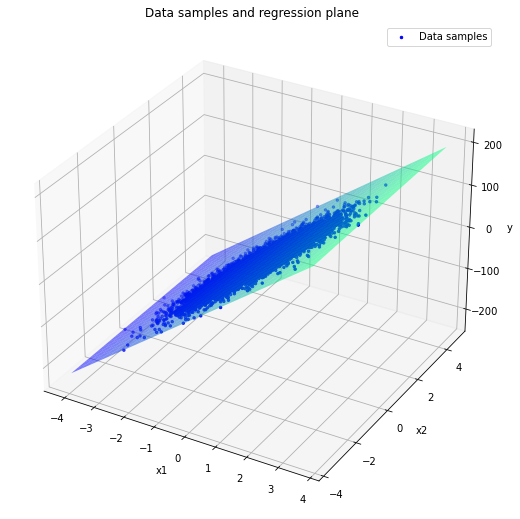

Веса: [ 3.04892941e-02  5.34858391e+01 -8.99433298e-02] 
y = 0.0304892941375958 + 53.48583913312805x1 + -0.08994332982436494x2
MSE: 1.7459228467855599
CPU times: total: 500 ms
Wall time: 494 ms


In [21]:
%%time

mod = models.LinearRegression('l2', plot=True)
mod.fit(X_train, y_train)

print(f'Веса: {mod.w} ')
print(mod)

pred = mod.predict(X_test)
res = np.mean((pred - y_test)**2)
print(f'MSE: {res}')

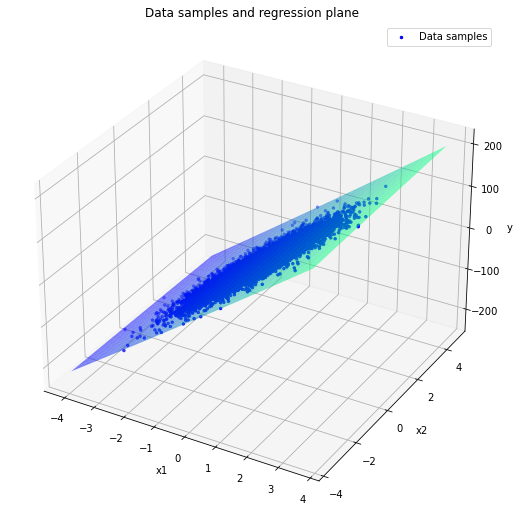

Веса: [ 7.81502788e-01  5.39149528e+01  7.60859071e-02  2.11239098e-01
  2.00488863e-01 -3.20367743e-02] 
y = 0.781502788191874 + 53.91495277454529x1 + 0.07608590711087002x2 + 0.21123909828861834x3 + 0.20048886349180917x4 + -0.03203677429410965x5
MSE: 1.8788300460607168
CPU times: total: 641 ms
Wall time: 640 ms


In [22]:
%%time

mod = models.PolynomialRegression('l2', degree=2, plot=True)
mod.fit(X_train, y_train)

print(f'Веса: {mod.w} ')
print(mod)

pred = mod.predict(X_test)
res = np.mean((pred - y_test)**2)
print(f'MSE: {res}')

### Датасет diabets

In [24]:
X, y = datasets.load_diabetes(return_X_y=True)
X_train = X[:-20]
X_test  = X[-20:]
y_train = y[:-20]
y_test  = y[-20:]

In [25]:
%%time

mod = models.LinearRegression('l2')
mod.fit(X_train, y_train)

print(f'Веса: {mod.w} ')
print(mod)

pred = mod.predict(X_test)
res = np.mean((pred - y_test)**2)
print(f'MSE: {res}')

Веса: [149.9369072    3.38727417   1.69506688   9.61483466   7.84783134
   3.85520173   3.26020376  -4.7384343    7.24818911   9.10279708
   6.48420518] 
y = 149.9369071997786 + 3.387274166768422x1 + 1.6950668776519446x2 + 9.614834655179502x3 + 7.847831341833082x4 + 3.855201730772068x5 + 3.260203756928557x6 + -4.738434303773312x7 + 7.2481891097412126x8 + 9.102797075638856x9 + 6.484205176923065x10
MSE: 5219.237024898118
CPU times: total: 15.6 ms
Wall time: 13 ms


In [26]:
%%time

mod = models.PolynomialRegression('l2')
mod.fit(X_train, y_train)

print(f'Веса: {mod.w} ')
print(mod)

pred = mod.predict(X_test)
res = np.mean((pred - y_test)**2)
print(f'MSE: {res}')

Веса: [155.14470153   4.95755232 -12.01930089  24.86947069  17.68497017
  -3.94079027  -5.56654905  -7.59069849   4.76315001  17.17785193
   5.23934708] 
y = 155.14470153070954 + 4.957552320435381x1 + -12.019300891147846x2 + 24.86947069107283x3 + 17.684970170606196x4 + -3.9407902709261333x5 + -5.566549054792884x6 + -7.590698488474691x7 + 4.763150005428778x8 + 17.17785193231681x9 + 5.239347083197395x10
MSE: 2238.261390484443
CPU times: total: 31.2 ms
Wall time: 14 ms


In [27]:
%%time

mod = models.ExpRegression('l2')
mod.fit(X_train, y_train)

print(f'Веса: {mod.w} ')
print(mod)

pred = mod.predict(X_test)
res = np.mean((pred - y_test)**2)
print(f'MSE: {res}')

Веса: [ 4.88607935e+00  1.86709917e-01 -1.74071537e+00  3.10291377e+00
  2.11996730e+00 -3.18522832e+00  2.35215999e+00 -1.17388662e+00
  1.30321396e-04  4.83307137e+00  2.43627319e-01] 
y = 132.4333299960364 * 1.2052776033231603 ** x1 * 0.1753948828345203 ** x2 * 22.262725256287744 ** x3 * 8.33086508570946 ** x4 * 0.04136879932449092 ** x5 * 10.508242904584657 ** x6 * 0.30916300400064545 ** x7 * 1.000130329888594 ** x8 * 125.59612041092181 ** x9 * 1.2758687494500807 ** x10
MSE: 1498.0186065740777
CPU times: total: 31.2 ms
Wall time: 1.99 ms


По датасету "diabets" наиболее лучшую оценку получила Экспоненциальная регрессия, а также она оказалась самой эффективной по времени.

### Датасет student-mat

In [49]:
students = pd.read_csv('student-mat.csv', sep=';')
students = students[['G1', 'G2', 'G3', 'age', 'studytime', 'failures', 'absences']]

X = np.array(students.drop(['G3'], axis=1))
y = np.array(students['G3'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [50]:
%%time

mod = models.PolynomialRegression('l2')
mod.fit(X_train, y_train)

print(f'Веса: {mod.w} ')

pred = mod.predict(X_test)
res = np.mean((pred - y_test)**2)
print(f'MSE: {res}')

Веса: [ 9.83709876  1.65038702  2.70925509 -0.58366443  0.14185501  0.09522702
  0.29637808] 
MSE: 5.434590882168421
CPU times: total: 0 ns
Wall time: 7.98 ms


### Generate synthetic data for exponential regression

In [51]:
x = np.arange(1, 21, 1)
y = np.array([1, 3, 5, 7, 9, 12, 15, 19, 23, 28,
              33, 38, 44, 50, 56, 64, 73, 84, 97, 113])

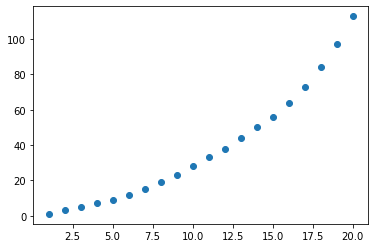

In [52]:
plt.scatter(x, y);

In [53]:
np.polyfit(x, np.log(y), 1)
np.exp(0.98165772 + 0.2041002 * x)

array([  3.27316668,   4.01428047,   4.923198  ,   6.03791359,
         7.40502423,   9.08167748,  11.13796029,  13.65982878,
        16.75270135,  20.54586533,  25.19788141,  30.90321179,
        37.90034898,  46.48178521,  57.00623911,  69.91365076,
        85.7435719 , 105.15772017, 128.96763998, 158.16862646])

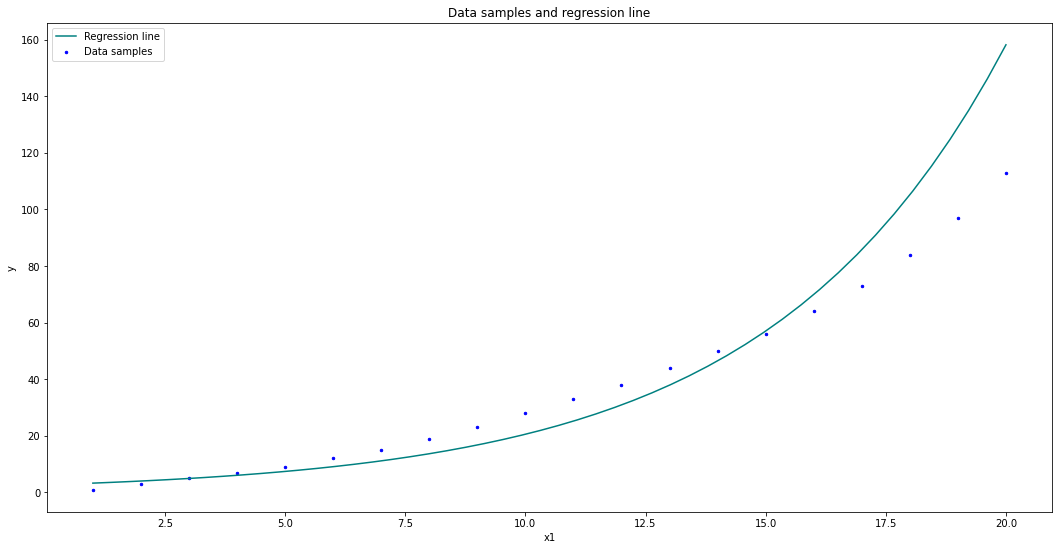

y = 2.668962839552477 * 1.226417266127345 ** x1


array([0.98168995, 0.20409713])

In [201]:
f = models.ExpRegression('l2', plot=True)
f.fit(x.reshape(-1, 1), y)
print(f)
f.w

In [32]:
X, y = datasets.make_regression(10000, 2, noise=0.8, n_informative=1)

In [36]:
def compare_sklearn_and_custom(skl, cust, X, y):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
    %time skl.fit(X_train, y_train)
    %time cust.fit(X_train, y_train)
    print(f'Sklearn model MSE: {metrics.mean_squared_error(y_test, skl.predict(X_test))},\
    Custom model MSE: {metrics.mean_squared_error(y_test, cust.predict(X_test))}')
    print(f'Sklearn model: {skl.intercept_, skl.coef_},\nCustom model: {cust.w}')

In [37]:
# Simple regression
compare_sklearn_and_custom(linear_model.LinearRegression(), models.LinearRegression(), X, y)

CPU times: total: 0 ns
Wall time: 999 µs
CPU times: total: 62.5 ms
Wall time: 67 ms
Sklearn model MSE: 0.64568772963686,    Custom model MSE: 0.6486469509462373
Sklearn model: (0.019415410286944212, array([-2.92375309e-03,  1.88307425e+01])),
Custom model: [ 5.42757560e-02 -1.30372513e-02  1.88167475e+01]


In [38]:
# l2 regression
compare_sklearn_and_custom(linear_model.Ridge(), models.LinearRegression('l2'), X, y)

CPU times: total: 0 ns
Wall time: 1 ms
CPU times: total: 78.1 ms
Wall time: 76 ms
Sklearn model MSE: 0.6869921029263515,    Custom model MSE: 0.7083007963262795
Sklearn model: (0.013331080498440964, array([2.02718554e-03, 1.88314214e+01])),
Custom model: [ 0.07732122 -0.05184118 18.68173865]


In [39]:
# l1 regression
compare_sklearn_and_custom(linear_model.Lasso(), models.LinearRegression('l1'), X, y)

CPU times: total: 0 ns
Wall time: 8.98 ms
CPU times: total: 93.8 ms
Wall time: 94 ms
Sklearn model MSE: 1.593695455773819,    Custom model MSE: 0.6461216192186344
Sklearn model: (0.0196679309826224, array([ 0.        , 17.83423398])),
Custom model: [ 6.31079362e-03 -3.76440825e-02  1.87591891e+01]


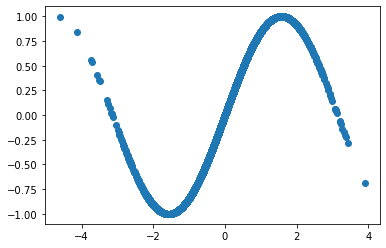

In [41]:
# Искусственно сгенерируем набор данных, который неплохо приближается полиномиальной регрессией
x = np.random.randn(10000, 2)
y = np.sin(x[:, 0]).flatten()
plt.scatter(x[:, 0], y);

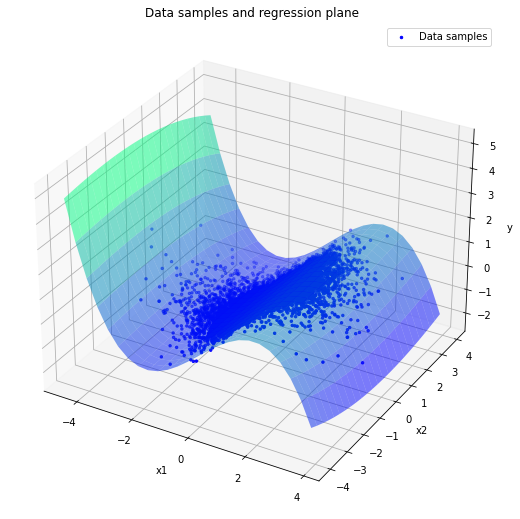

In [44]:
pr = models.PolynomialRegression('l2', degree=3, plot=True)
pr.fit(x, y);

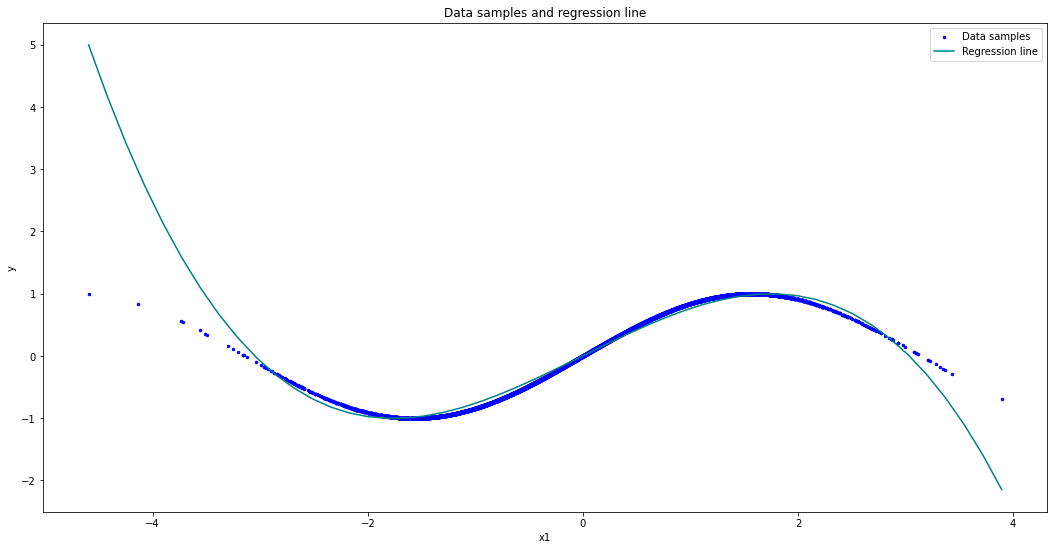

In [45]:
pr = models.PolynomialRegression('l2', degree=3, plot=True)
pr.fit(x[:, 0].reshape(-1, 1), y);